In [1]:
from numpy import loadtxt, real, abs, linspace, complex_
import matplotlib.pyplot as plt
import subprocess

#my_cmap=plt.cm.viridis
#my_cmap=plt.cm.plasma
my_cmap=plt.cm.cividis

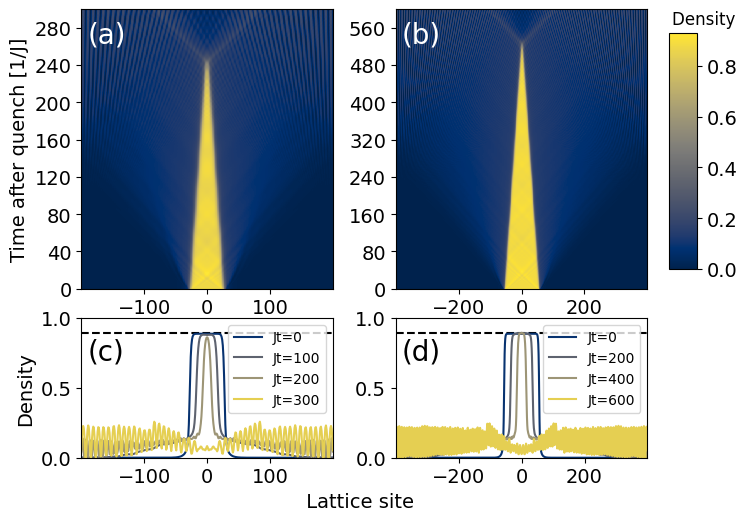

In [2]:
fig, ax = plt.subplots(2,2,gridspec_kw={'height_ratios': [2, 1]})
fig.set_size_inches(18/2.54, 12/2.54)

J, U0, U, V = 1, 40, -40, -1.90 # initial state: real random gauss state
τ=0.001

colors = my_cmap(linspace(0.1,0.9,4))
#################
N,Ns,lastRow = 50,401,3000
filename ="N"+str(N)+"_Ns"+str(Ns)+"_J"+str(J)+"_U0"+str(U0)+"_U"+str(U)+"_V"+str(V)+"_τ"+str(τ)+".txt" 
data = loadtxt( filename , dtype=complex_, usecols=range(7,408), max_rows=lastRow)

rhos = abs(data)**2
evTime = round(real(loadtxt( filename , dtype=complex_, usecols=[0])[lastRow]),4)
im0 = ax[0,0].imshow(rhos,interpolation='none',cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(Ns/2)-0.5,int(Ns/2)+0.5,0,evTime])  

#################
N,Ns,lastRow = 100,801,6000
filename ="N"+str(N)+"_Ns"+str(Ns)+"_J"+str(J)+"_U0"+str(U0)+"_U"+str(U)+"_V"+str(V)+"_τ"+str(τ)+".txt" 
data = loadtxt( filename , dtype=complex_, usecols=range(7,808), max_rows=lastRow)

rhos = abs(data)**2
evTime = round(real(loadtxt( filename , dtype=complex_, usecols=[0])[lastRow]),4)
im1 = ax[0,1].imshow(rhos,interpolation='none',cmap=my_cmap,origin='lower',aspect="auto",extent=[-int(Ns/2)-0.5,int(Ns/2)+0.5,0,evTime])  
ax[1,1].axhline(y=0.88860418, color='black', linestyle='--')
ax[1,0].axhline(y=0.88860418, color='black', linestyle='--')
ax[0,0].set_xticks([-100,0,100])
ax[0,1].set_xticks([-200,0,200])

ax[0,0].set_yticks([0,40,80,120,160,200,240,280])
ax[0,1].set_yticks([0,80,160,240,320,400,480,560])

ax[0,0].text(-401/2*0.95,37/42*300,"(a)",fontsize=20,c='white')
ax[0,1].text(-801/2*0.95,37/42*600,"(b)",fontsize=20,c='white')

plt.tight_layout(pad=0.0, w_pad=0.8, h_pad=0.0)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.45, 0.04, 0.5])
cbar = fig.colorbar(im1, cax=cbar_ax)

ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)
cbar.ax.set_title(r'        Density',fontsize=12)

ax[0,0].set_ylabel("Time after quench [1/J]",fontsize=14)
#####################################################################
filename ="N"+str(50)+"_Ns"+str(401)+"_J"+str(J)+"_U0"+str(U0)+"_U"+str(U)+"_V"+str(V)+"_τ"+str(τ)+".txt" 

ns = range(-200,201,1)
linesToPlot = ['1','1001','2001','3001']
i=0
for lineNum in linesToPlot:
    if lineNum=='last':
        result = subprocess.run(['tail', '-2',filename], stdout=subprocess.PIPE)
    else:
        result = subprocess.run(['sed','-n',lineNum+'p',filename], stdout=subprocess.PIPE)
    line = result.stdout.splitlines()
    cells = [complex(x.decode("utf-8"))  for x in line[0].split()]
    t = cells[0]
    E = real(cells[1])


    rho = abs(cells[len(cells)-401-1:-1])**2
    
    ax[1,0].plot(ns, rho,color=colors[i],label="Jt="+str(int(round(real(t),0))))
    i+=1
    
ns = range(-400,401,1)    
filename ="N"+str(100)+"_Ns"+str(801)+"_J"+str(J)+"_U0"+str(U0)+"_U"+str(U)+"_V"+str(V)+"_τ"+str(τ)+".txt" 

linesToPlot = ['1','2001','4001','6001'] 
i=0
for lineNum in linesToPlot:
    if lineNum=='last':
        result = subprocess.run(['tail', '-2',filename], stdout=subprocess.PIPE)
    else:
        result = subprocess.run(['sed','-n',lineNum+'p',filename], stdout=subprocess.PIPE)
    line = result.stdout.splitlines()
    cells = [complex(x.decode("utf-8"))  for x in line[0].split()]
    t = cells[0]
    E = real(cells[1])


    rho = abs(cells[len(cells)-801-1:-1])**2
    
    ax[1,1].plot(ns,rho,color=colors[i],label="Jt="+str(int(round(real(t),0))))
    i+=1
    
ax[1,0].legend(fontsize=10)
ax[1,1].legend(fontsize=10)
ax[1,0].set_ylim([0,1])
ax[1,1].set_ylim([0,1])
ax[1,0].set_xlim([-200,200])
ax[1,1].set_xlim([-400,400])
ax[1,0].text(-401/2*0.95,0.7,"(c)",fontsize=20,c='black')
ax[1,1].text(-801/2*0.95,0.7,"(d)",fontsize=20,c='black')
ax[1,0].set_xticks([-100,0,100])
ax[1,1].set_xticks([-200,0,200])
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].set_ylabel("Density",fontsize=14)
ax[1,0].set_yticks([0,0.5,1])
ax[1,1].set_yticks([0,0.5,1])
plt.subplots_adjust(wspace=0.25)

ax[1,0].set_xlabel("                                                 Lattice site",fontsize=14)
plt.savefig("dens_ev_50_100_190.pdf",format='pdf',dpi=300, transparent=False, bbox_inches = "tight")

plt.show()